In [1079]:
from __future__ import print_function, division

from IPython.core.display import Image, HTML

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

PATH = './assets/images/'

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Tuning Clusters
Week 7 | Lesson 1.2

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Describe how to evaluate a a cluster with or without labels
- Use sklearn to evaluate cluster quality

### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 10 min  | Introduction| So I performed a clustering analysis - Now what  |
| 15 min  | Demo| Techniques to Evaluate Clusters  |
| 25 min  | Guided Practice| Practice Cluster Evaluation Techniques |
| 25 min  | Independent Practice| Perform a k-means cluster analysis and evaluate the results |
| 5 min  | Conclusion| Conclusion  |

## REVIEW: What is K-Means Clustering?

[K-Means Demo]("http://shabal.in/visuals/kmeans/top.gif")

## How Do We Know We Did a Good Job?

In [3]:
Image(url="http://www.punjabigraphics.com/images/156/Great-Job-You-Rock-Kid-Picture.jpg")

## Evaluation Metrics

The key to understanding your clustering analysis are the visual evaluation of your clusters, the measurement of their characteristics, and the computation of metrics that can measure how good your analysis is and how to interpret it. In the following sections, we'll look at a few common methods for understanding and validating your analysis.

## Techniques to Evaluate Clusters

## Two scenarios:
1. We know the labels
2. We don't know the labels

## Two scenarios:
1. We know the labels **(almost never to never)**
2. We don't know the labels **(pretty much always)**

## Scenario One - Known Labels

### Visual Inspection - Actual vs. Predicted

We can compare the classification of the original data to the classification given by our analysis.

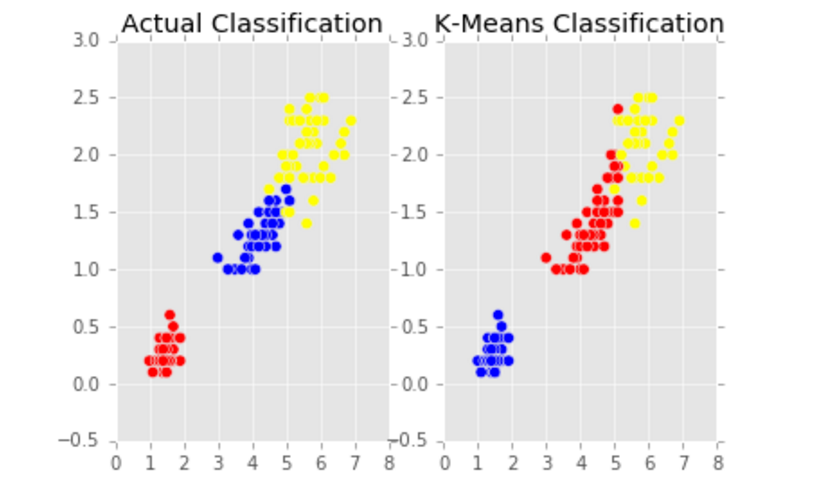

In [7]:
Image(PATH + 'plot2.png')

### Classification Report (Precision, Recall, F-measure)

The F measure, sometimes known as the F1 Score, is used to measure the test's accuracy by measuring the number of correct positive results versus the positive results that should have been returned. It is the weighted average of the precision and recall - where precision is the amount of items that were relevant to our analysis, and recall being the number of relevant items that were successfully retrieved.

In [1072]:
from sklearn.metrics import classification_report

labels_true = [0, 0, 0, 2, 2, 2, 2, 1]
labels_pred = [0, 0, 0, 1, 1, 1, 0, 1]

print(classification_report(labels_true, labels_pred))

             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       0.25      1.00      0.40         1
          2       0.00      0.00      0.00         4

avg / total       0.31      0.50      0.37         8



## Classification Report Pros and Cons:

Pros:
- Metrics for precision, recall, and f1 per class
- No way to see which are misclassified

Cons:
- Must handle permutations
- No normalization for random chance
- Ground-truth labels required

### Confusion Matrix

In [1073]:
from sklearn.metrics import confusion_matrix

labels_true = [0, 0, 0, 2, 2, 2, 2, 1]
labels_pred = [0, 0, 0, 1, 1, 1, 0, 1]

confusion_matrix(labels_true, labels_pred) 

array([[3, 0, 0],
       [0, 1, 0],
       [1, 3, 0]])

## Confusion Matrix Pros and Cons:

Pros:
- Easy to visualize misclassification errors

Cons:
- Must account for permutations
- No normalization for random chance
- Ground-truth labels required

## Adjusted Mutual Information

Adjusted Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations. It is normalized against chance assignment.

In [1074]:
from sklearn.metrics import adjusted_mutual_info_score

labels_true = [0, 0, 0, 2, 2, 2, 2, 1]
labels_pred = [0, 0, 0, 1, 1, 1, 0, 1]

adjusted_mutual_info_score(labels_true, labels_pred) 

0.29045838425852

## AMI Pros and Cons:

Pros:
- Random (uniform) label assignments have a AMI score close to 0.0
- Bounded range [0, 1] - Values close to zero indicate two label assignments that are largely independent, while values close to one indicate significant agreement. 
- No assumption is made on the cluster structure

Cons:
- Must have ground-truth labels

## Scenario Two: Unknown Labels

## Visual Inspection

When evaluating clusters, the first and easiest method is to visually examine the output of the clustering algorithm. After we run the algorithm and calculate the centroids as we did in the previous lesson, we can plot the resulting clusters to see where the centroids are based and how the clusters are grouping.

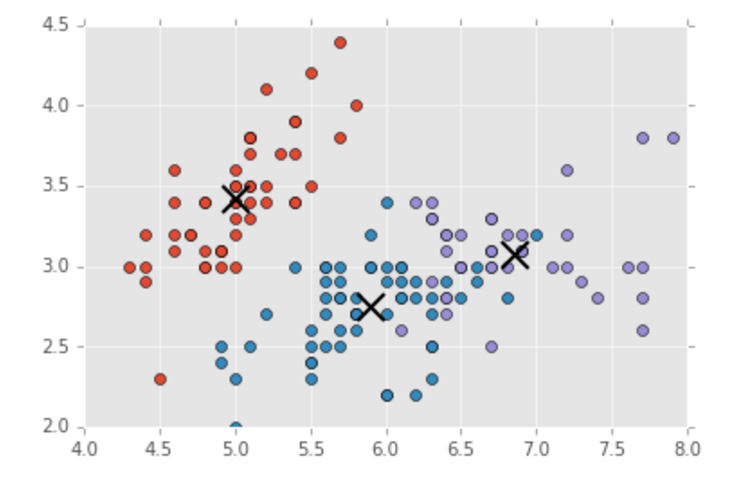

In [6]:
Image(PATH + 'plot.png')

### Silhouette Scores

The silhouette score, or silhouette coefficient, is the measure of how closely related a point is to members of its cluster rather than members of other clusters. If the resulting score is high, then the clustering analysis has an appropriate number of clusters. If the score is low, there are either too many or too few clusters.

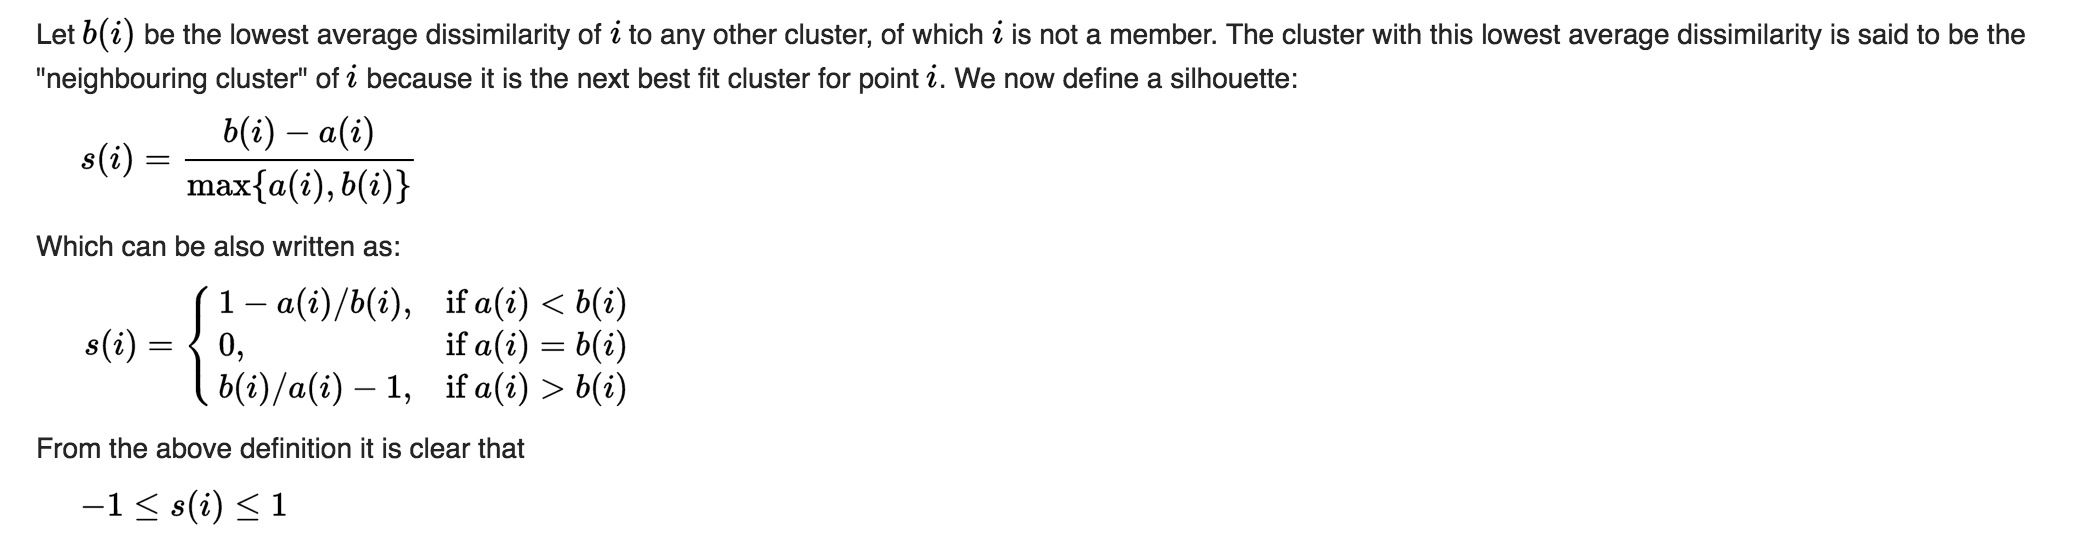

In [1077]:
Image(PATH + 'silhouette_score.png')

## Guided Practice: Perform a K-Means Analysis and Evaluate the Clusters

## Set our imports

In [1194]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

## Make some clusters

In [1195]:
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=4,
                  cluster_std=2,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=21)

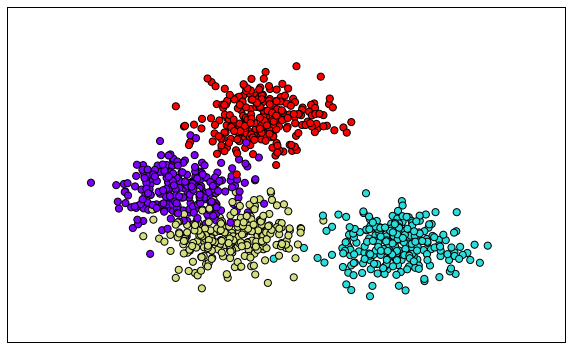

In [1196]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');
ax.set_xticks([]);
ax.set_yticks([]);

## Run k-means

In [1197]:
k = 4
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

## Fix permuted labels

In [1198]:
labels = np.zeros_like(clusters)
for i in range(4):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

## Plot our centroids

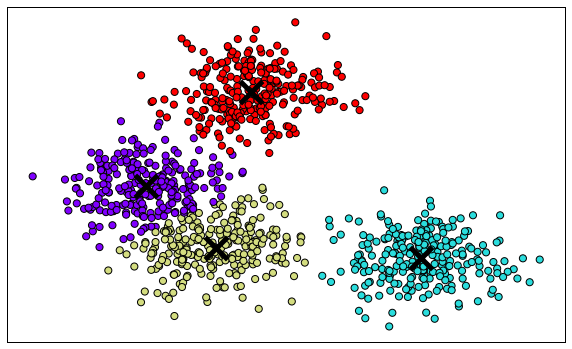

In [1199]:
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow');
ax.set_xticks([]);
ax.set_yticks([]);

plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=500, linewidths=5,
            color='k', zorder=10)

## Check the accuracy of our predictions

In [1200]:
df = pd.DataFrame(zip(y, labels), columns=['true','pred'])
df['correct'] = df.apply(lambda x: 1 if x['true'] == x['pred'] else 0, axis=1)
df

,true,pred,correct
0,3,3,1
1,2,2,1
2,1,1,1
3,3,3,1
4,2,2,1
5,1,1,1
6,2,2,1
7,1,1,1
8,3,3,1
9,3,3,1


## Hand-calc it

In [1201]:
df['correct'].sum()/df['correct'].count()

0.95299999999999996

## Confirm with accuracy score

In [1202]:
accuracy_score(y, labels)

0.95299999999999996

## Run classification report

In [1203]:
print(classification_report(y, labels))

             precision    recall  f1-score   support

          0       0.93      0.90      0.91       250
          1       1.00      0.99      0.99       250
          2       0.92      0.94      0.93       250
          3       0.97      0.98      0.98       250

avg / total       0.95      0.95      0.95      1000



## Get our confusion matrix

[[224   0  19   7]
 [  0 248   2   0]
 [ 14   1 235   0]
 [  4   0   0 246]]


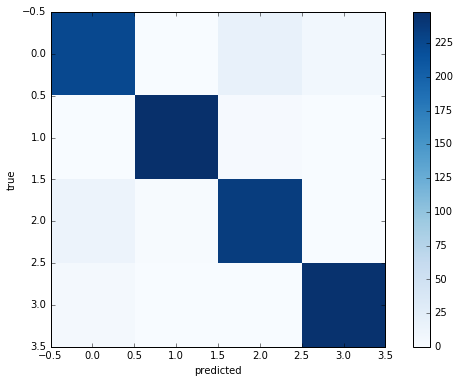

In [1204]:
fig, ax = plt.subplots(figsize=(10,6))
print(confusion_matrix(y, labels))
plt.imshow(confusion_matrix(y, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

## Get our silouette score

In [1205]:
silhouette_score(X, y)

0.51681551542824211

## Visualizing the silouette score

For n_clusters = 2 The average silhouette_score is : 0.477600567771


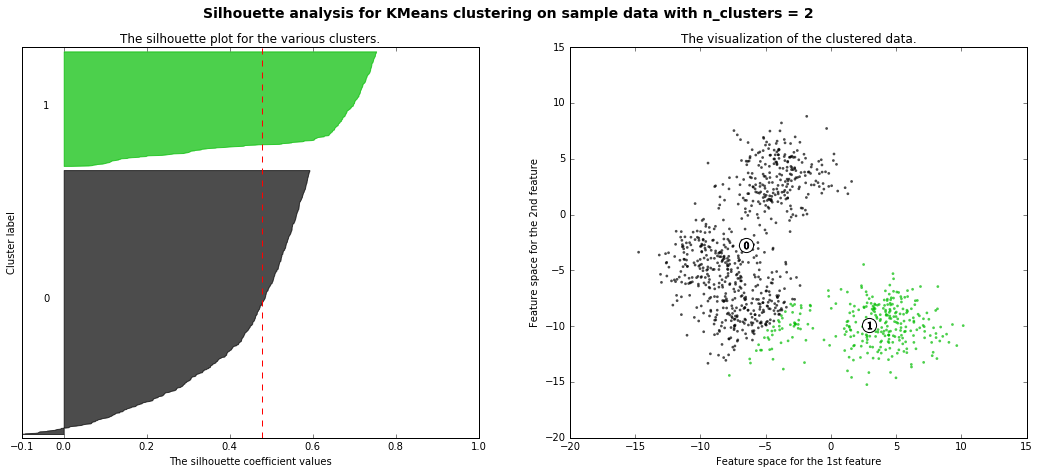

For n_clusters = 3 The average silhouette_score is : 0.582064716688


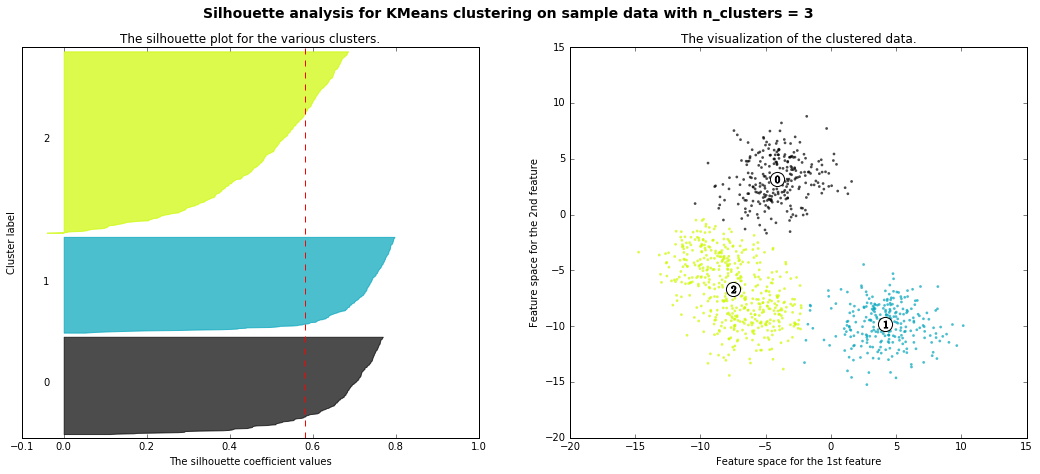

For n_clusters = 4 The average silhouette_score is : 0.546038611724


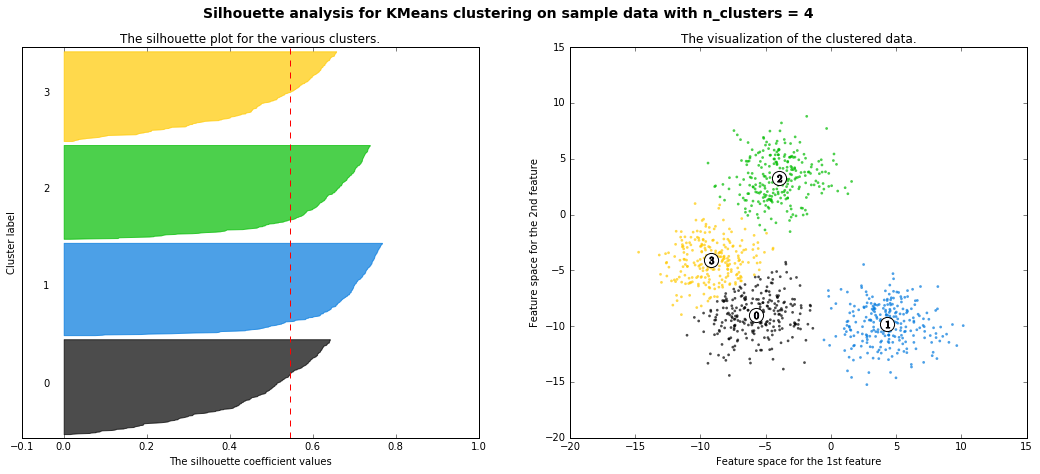

For n_clusters = 5 The average silhouette_score is : 0.495027634131


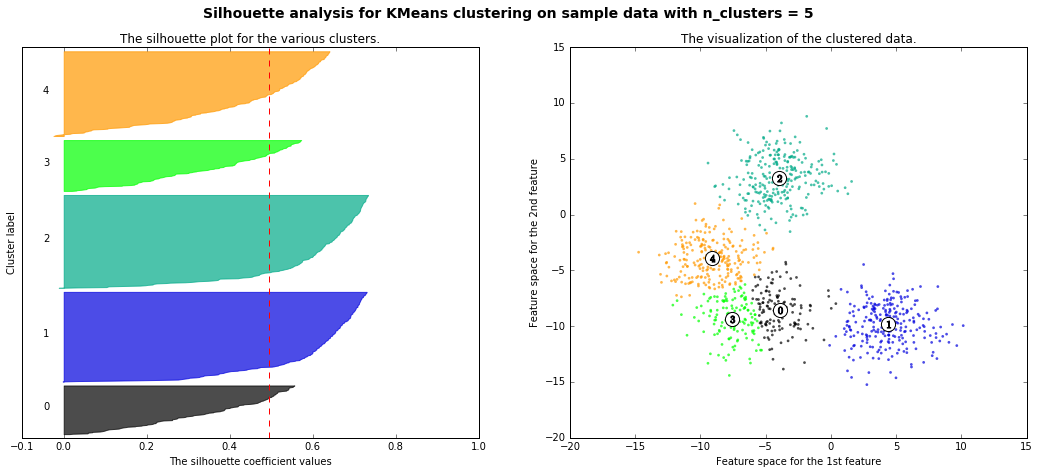

For n_clusters = 6 The average silhouette_score is : 0.433775518414


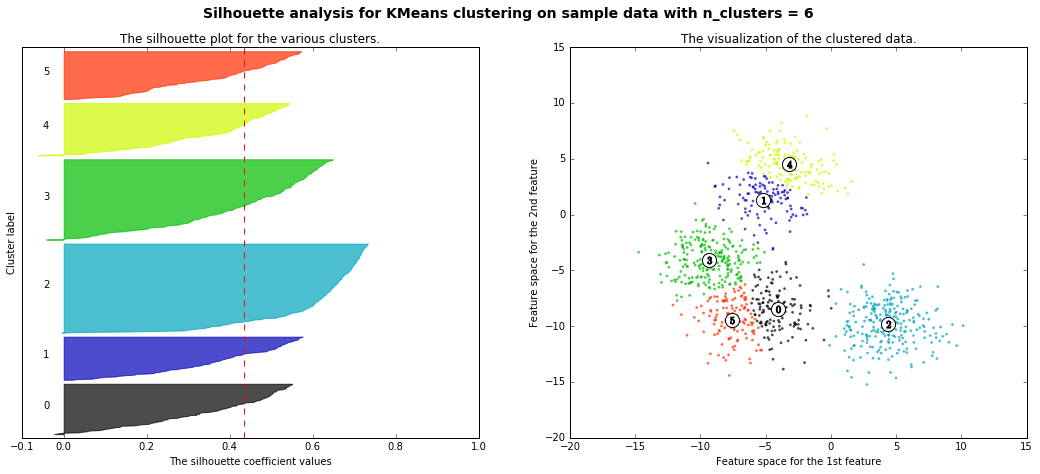

In [1044]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## Try it on a more complex data set

## Load the digits data set

In [1045]:
from sklearn.datasets import load_digits
digits = load_digits()

## Run k-means

In [1046]:
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

## Plot our centers

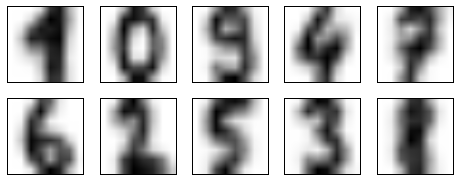

In [1047]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

## Fix permuted labels

In [1048]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

## Reduce the dimensionality with PCA and plot

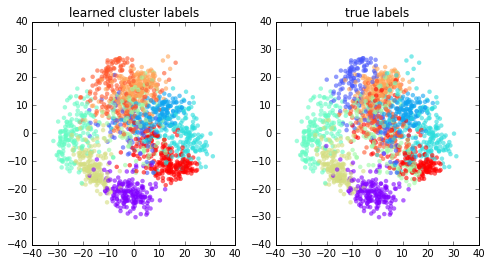

In [1049]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('true labels');

## Get our accuracy score

In [1050]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.79243183082915969

## Plot our confusion matrix

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 147  13   0   0   0   4   8   2]
 [  0   0   0 155   0   2   0   7   7  12]
 [  0   5   0   0 163   0   0  11   2   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   0   0 175   2   0]
 [  0   6   3   2   0   4   2   5 100  52]
 [  0  20   0   6   0   6   0   8   1 139]]


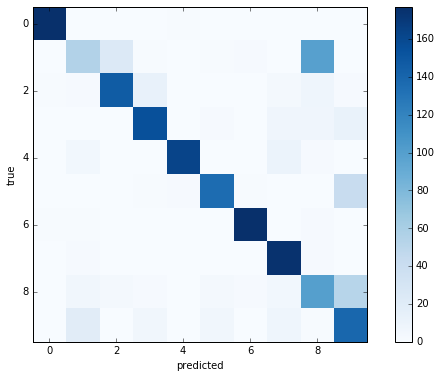

In [1051]:
fig, ax = plt.subplots(figsize=(10,6))
print(confusion_matrix(digits.target, labels))
plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

## Independent Practice

Now that we've walked through the process of clustering and measuring your clusters, it's time to put your skills to the test. We're going to be looking at the [classic Iris dataset](./assets/datasets/iris.csv) to understand how the measurements cluster and how to evaluate our analysis. 

Open the [starter code](./code/starter-code/starter-code.ipynb) and try to work through both exercises. Do your best!